In [12]:
import numpy as np
import matplotlib.pyplot as plt

import symforce
try:
    #symforce.set_epsilon_to_symbol()
    symforce.set_epsilon_to_number()
except symforce.AlreadyUsedEpsilon:
    print("Already set symforce epsilon")
    pass 

import symforce.symbolic as sf

%load_ext autoreload
%autoreload 2

Already set symforce epsilon
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
v = sf.Symbol('v')
w = sf.Symbol('w')
t = sf.Symbol('t')

dx = v * sf.sin(w * t) / w
dx.subs({v: 1, w: 0, t: 1})

0

In [9]:
def dx(v: sf.Scalar, w: sf.Scalar, t: sf.Scalar, epsilon: sf.Scalar = sf.epsilon()) -> sf.Scalar:
    return v * sf.sin((w + epsilon) * t) / (w + epsilon)

def dy(v: sf.Scalar, w: sf.Scalar, t: sf.Scalar, epsilon: sf.Scalar = sf.epsilon()) -> sf.Scalar:
    return v * (1 - sf.cos((w + epsilon) * t)) / (w + epsilon)

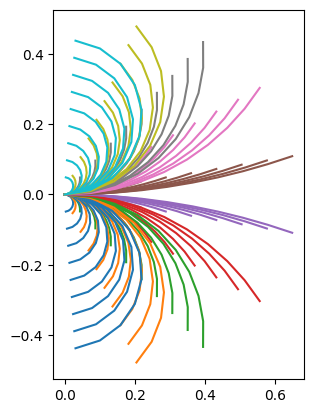

In [18]:
# Test dx and dy over samples of v, w, t
v_samples = np.linspace(0, 0.22, 10)
w_samples = np.linspace(-1.0, 1.0, 10)
t_samples = np.linspace(0, 3, 10)

fig, ax = plt.subplots(1, 1)
for v in v_samples:
    for w in w_samples:
        x = [dx(v, w, t) for t in t_samples]
        y = [dy(v, w, t) for t in t_samples]
        ax.plot(x, y)

ax.set_aspect('equal')

In [31]:
from symforce.values import Values

init_pose = sf.Pose2.identity()
goal = sf.V2(5, 0)
tf = 3.0

values = Values(
    v = 0.0,
    w = 0.0,
    goal = goal,
    init_pose = init_pose,
    tf = tf,
    epsilon = sf.numeric_epsilon,
)

In [32]:
def goal_residual(v: sf.Scalar, w: sf.Scalar, tf: sf.Scalar, 
                  goal: sf.V2, 
                  epsilon: sf.Scalar) -> sf.V2:
    return sf.V2(dx(v, w, tf, epsilon), dy(v, w, tf, epsilon)) - goal

def bounds_residual(v: sf.Scalar, w: sf.Scalar, 
                    epsilon: sf.Scalar) -> sf.V2:
    return sf.V2(v, w) - sf.V2(0.22, 1.0)

In [33]:
from symforce.opt.optimizer import Optimizer
from symforce.opt.factor import Factor

factors = []

factors.append(Factor(residual=goal_residual, keys=["v", "w", "tf", "goal", "epsilon"]))

optimizer = Optimizer(
    factors=factors,
    optimized_keys=["v", "w"],
    # So that we save more information about each iteration, to visualize later:
    debug_stats=True,
)

result = optimizer.optimize(values)

[2023-05-04 13:06:59.552] [info] LM<sym::Optimize> [iter    0] lambda: 1.000e+00, error prev/linear/new: 12.500/0.125/0.125, rel reduction: 0.99000
[2023-05-04 13:06:59.554] [info] LM<sym::Optimize> [iter    1] lambda: 2.500e-01, error prev/linear/new: 0.125/0.000/0.000, rel reduction: 0.99927
[2023-05-04 13:06:59.554] [info] LM<sym::Optimize> [iter    2] lambda: 6.250e-02, error prev/linear/new: 0.000/0.000/0.000, rel reduction: 0.99994
[2023-05-04 13:06:59.555] [info] LM<sym::Optimize> [iter    3] lambda: 1.562e-02, error prev/linear/new: 0.000/0.000/0.000, rel reduction: 0.81327
[2023-05-04 13:06:59.555] [info] LM<sym::Optimize> [iter    4] lambda: 3.906e-03, error prev/linear/new: 0.000/0.000/0.000, rel reduction: 0.00001
[2023-05-04 13:06:59.556] [info] LM<sym::Optimize> [iter    5] lambda: 9.766e-04, error prev/linear/new: 0.000/0.000/0.000, rel reduction: 0.00000


In [34]:
result

Optimizer.Result(initial_values=Values(
  v: 0.0,
  w: 0.0,
  goal: [5]
[0],
  init_pose: <Pose2 R=<Rot2 <C real=1, imag=0>>, t=(0, 0)>,
  tf: 3.0,
  epsilon: 2.220446049250313e-15,
), optimized_values=Values(
  v: 1.666666666666664,
  w: -3.3631399568519993e-10,
  goal: [5. 0.],
  init_pose: <Pose2 [1.0, 0.0, 0.0, 0.0]>,
  tf: 3.0,
  epsilon: 2.220446049250313e-15,
), iteration_stats=[optimization_iteration_t(iteration=-1, current_lambda=1.0, new_error_linear=0.0, new_error=12.5, relative_reduction=0.0, update_accepted=False, update_angle_change=0.0, values=values_t(index=index_t(storage_dim=10, tangent_dim=9, entries=[index_entry_t(key=key_t(letter=120, subscript=0, superscript=-9223372036854775808), type=type_t.SCALAR, offset=0, storage_dim=1, tangent_dim=1), index_entry_t(key=key_t(letter=120, subscript=1, superscript=-9223372036854775808), type=type_t.SCALAR, offset=1, storage_dim=1, tangent_dim=1), index_entry_t(key=key_t(letter=118, subscript=2, superscript=-9223372036854775808)